In [ ]:
#Australian Real Estate Data Analysis ( Project 1 Group 6)

In [ ]:
#How does the number of bedrooms and bathrooms affect property prices?"
#What is the average property price in each city? And how it varies ?
#What is the average proprty price in different cities for each type ( Apartment , House, Townhouse)? And how it varies ?

In [ ]:
#what is the number of houses built per year per each city. What is the average increase across each city
    A line plot showing the cumulative number of houses built over time for each city.
    A bar plot showing the average yearly increase in houses built for each city.
# List down the  properties in the sort order of year built,SQFT, Lot_Area, Garage, type and price. 
#display the dataset
# from the same dataset, create another dataset with the criteria of house built < 20 years (from current date) and then sort the new dataset 
#in the order of type and city
    A scatter plot with Year built on x-axis vs City in the y axis. 
    A box set with the same parameters


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as Path
from datetime import datetime
import seaborn as sns

In [10]:
# Load the data
file_path = 'aus_real_estate.csv'
df = pd.read_csv(file_path)

In [20]:
print(len(df))
df.dtypes

5000


Price          int64
Bedrooms       int64
Bathrooms      int64
SqFt           int64
City          object
State         object
Year_Built     int64
Type          object
Garage         int64
Lot_Area       int64
dtype: object

In [23]:
#what is the number of houses built per year per each city. What is the average increase across each city
grp_year_city=df.groupby(["Year_Built","City"])["Year_Built"].count()
grp_year_city

Year_Built  City     
1950        Adelaide     16
            Brisbane     15
            Melbourne    17
            Perth        10
            Sydney       16
                         ..
2022        Adelaide     12
            Brisbane      6
            Melbourne    10
            Perth        11
            Sydney       16
Name: Year_Built, Length: 365, dtype: int64

Average yearly increase in number of houses built per city:
Year_Built
1950    0.00
1951    0.25
1952   -1.00
1953    1.50
1954   -0.25
        ... 
2018    1.50
2019    0.00
2020   -0.50
2021   -1.50
2022    1.00
Length: 73, dtype: float64


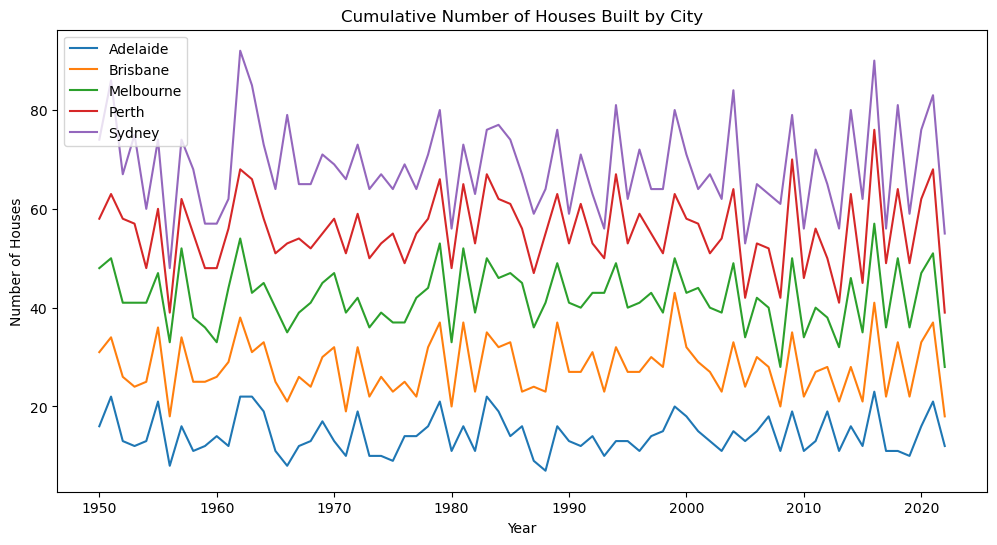

In [56]:
# Group by city and year_built, and count the number of houses
grp_year_city = df.groupby(['City', 'Year_Built']).size().unstack(fill_value=0)

# Calculate the cumulative sum of houses built for each city
cumulative_houses = grp_year_city.cumsum()

# Calculate the year-over-year increase for each city
yearly_increase = grp_year_city.diff()

# Calculate the average increase for each city
avg_increase = yearly_increase.mean()

print("Average yearly increase in number of houses built per city:")
print(avg_increase)

# Visualize the cumulative number of houses built for each city
plt.figure(figsize=(12, 6))
for city in cumulative_houses.index:
    plt.plot(cumulative_houses.columns, cumulative_houses.loc[city], label=city)

plt.title('Cumulative Number of Houses Built by City')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.legend()
plt.show()


Overall average yearly increase across all cities: -0.33


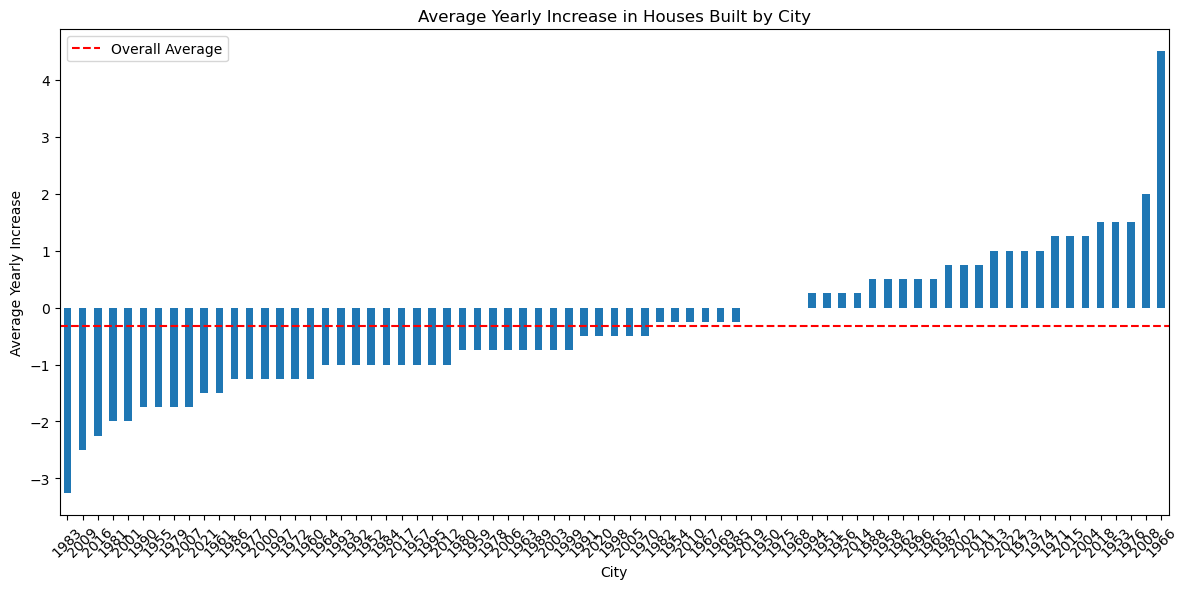

In [57]:
# Calculate the overall average increase across all cities
overall_avg_increase = avg_increase.mean()

print(f"\nOverall average yearly increase across all cities: {overall_avg_increase:.2f}")

# Visualize the average yearly increase for each city
plt.figure(figsize=(12, 6))
avg_increase.sort_values().plot(kind='bar')
plt.title('Average Yearly Increase in Houses Built by City')
plt.xlabel('City')
plt.ylabel('Average Yearly Increase')
plt.axhline(y=overall_avg_increase, color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# List down the  properties in the sort order of year built,SQFT, Lot_Area, Garage, type and price. 
#display the dataset
df.sort_values(["Year_Built","SqFt","Lot_Area","Garage","Type","Price"])

,Price,Bedrooms,Bathrooms,SqFt,City,State,Year_Built,Type,Garage,Lot_Area
1808,1461414,3,2,870,Melbourne,NSW,1950,Townhouse,1,3622
3105,732934,4,1,886,Sydney,QLD,1950,Apartment,1,1678
4685,1211820,5,2,912,Adelaide,NSW,1950,House,1,7715
4924,128353,3,2,973,Adelaide,QLD,1950,House,0,6366
2690,1530925,1,1,1046,Melbourne,QLD,1950,House,1,4943
...,...,...,...,...,...,...,...,...,...,...
545,889725,5,2,3735,Perth,VIC,2022,House,1,9916
580,862472,4,1,3851,Perth,VIC,2022,Apartment,1,1302
3009,334885,2,3,3896,Sydney,SA,2022,Apartment,1,6668
4838,160150,4,3,3908,Melbourne,VIC,2022,Apartment,0,9540


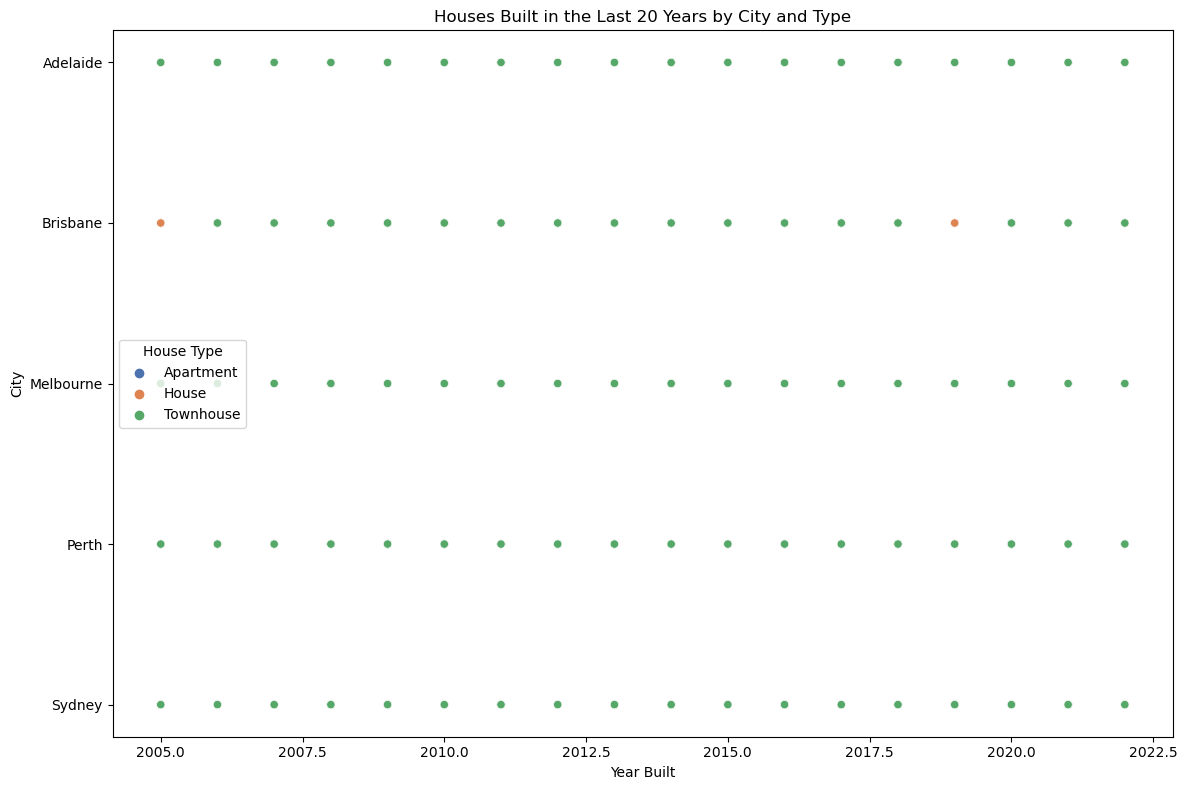

In [51]:
# from the same dataset, create another dataset with the criteria of house built < 20 years (from current date) and then sort the new dataset
#in the order of type and city
cur_year = datetime.now().year
filter_df = df[df['Year_Built'] > (cur_year - 20)].copy()

# Sort the new dataset by type and city
filter_df_sorted = filter_df.sort_values(['Type', 'City'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filter_df_sorted, x='Year_Built', y='City', hue='Type', palette='deep')
plt.title('Houses Built in the Last 20 Years by City and Type')
plt.xlabel('Year Built')
plt.ylabel('City')
plt.legend(title='House Type')
plt.tight_layout()
plt.show()

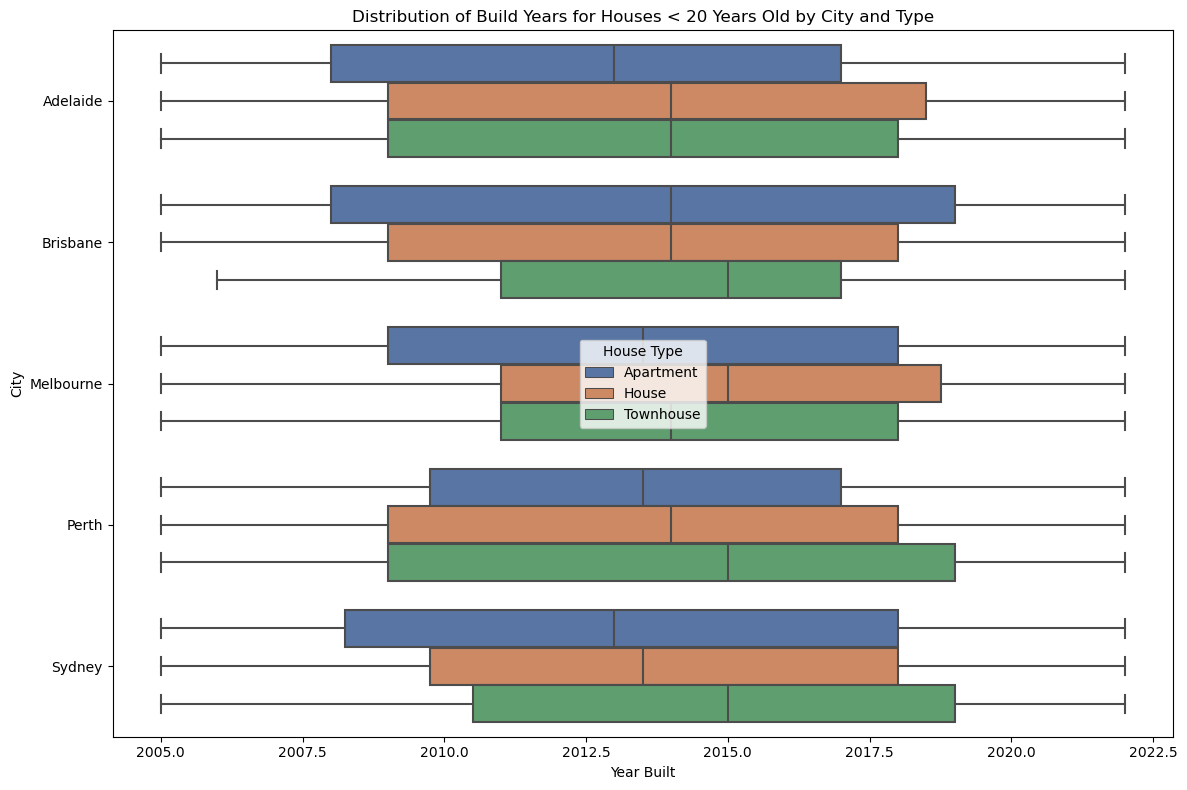

                     count         mean       std     min      25%     50%  \
City      Type                                                               
Adelaide  Apartment   87.0  2012.839080  5.352403  2005.0  2008.00  2013.0   
          House       83.0  2013.867470  5.098472  2005.0  2009.00  2014.0   
          Townhouse   92.0  2013.782609  5.167153  2005.0  2009.00  2014.0   
Brisbane  Apartment   93.0  2013.602151  5.750501  2005.0  2008.00  2014.0   
          House       70.0  2013.485714  5.106809  2005.0  2009.00  2014.0   
          Townhouse   65.0  2014.369231  4.222593  2006.0  2011.00  2015.0   
Melbourne Apartment   78.0  2013.141026  5.376052  2005.0  2009.00  2013.5   
          House       74.0  2014.635135  4.770268  2005.0  2011.00  2015.0   
          Townhouse   82.0  2013.963415  4.805977  2005.0  2011.00  2014.0   
Perth     Apartment   80.0  2013.412500  4.694985  2005.0  2009.75  2013.5   
          House       81.0  2013.592593  5.103376  2005.0  2009.

In [55]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filter_df_sorted, x='Year_Built', y='City', hue='Type', palette='deep')
plt.title('Distribution of Build Years for Houses < 20 Years Old by City and Type')
plt.xlabel('Year Built')
plt.ylabel('City')
plt.legend(title='House Type')
plt.tight_layout()
plt.show()

# Print some summary statistics
print(filter_df_sorted.groupby(['City', 'Type'])['Year_Built'].describe())